# Breast Cancer Classification

## 1. Introduction

It is crucial to detect cancer in early stages. 

One way to do it is extracting useful features from digitalized images of tumor cells that we can classify whether the tumor is malignant or benign. 

### Data Source: 

Dataset can be downloaded 
<a href="https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)" target="_blank">here</a>:


or be imported by `sklearn`



### References:
- https://www.researchgate.net/publication/271907638_Breast_Cancer_Detection_with_Reduced_Feature_Set

### The Dataset (more details in `wdbc.names`):

Number of instances: 569

Number of used attributes (some examples below): 30

  - radius (mean of distances from center to points on the perimeter)
  - texture (standard deviation of gray-scale values)
  - perimeter
  - area
  - smoothness (local variation in radius lengths)
  - compactness (perimeter^2 / area - 1.0)
  - concavity (severity of concave portions of the contour)
  - concave points (number of concave portions of the contour)
  - symmetry 
  - fractal dimension ("coastline approximation" - 1)

**Note**: These features are already generated from cell images, hence we do not need to implement it by our own.

Target distribution (binary target): 
   - 357 benign (life-threatened)
   - 212 malignant (not serious)

### Task:
Input 30 attributes and classify target (malignant or benign)

## 2. Data Import

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import cancer dataset
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### Note: 
- The cancer dataset is in dictionary-shaped format.
- "data" parts shows 30 features, and "target" parts shows whether tumor is malignant or benign.

In [4]:
# Dictionary keys
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# Dataset discription
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
# Dictionary targets (labels)
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
print(cancer['target_names'])

['malignant' 'benign']


In [8]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
cancer['data'].shape

(569, 30)

In [10]:
# Convert dictionary-like dataset to dataframe
df_cancer = pd.DataFrame(cancer['data'], columns=list(cancer['feature_names']))
df_cancer['target'] = cancer['target']
df_cancer.head()

# An easier way to make conversion
# df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
# df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 3. Data Visualization

Pairplot documentation is <a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html" target="_blank">here</a>

Add **hue='target'** to show different targets in pairplots

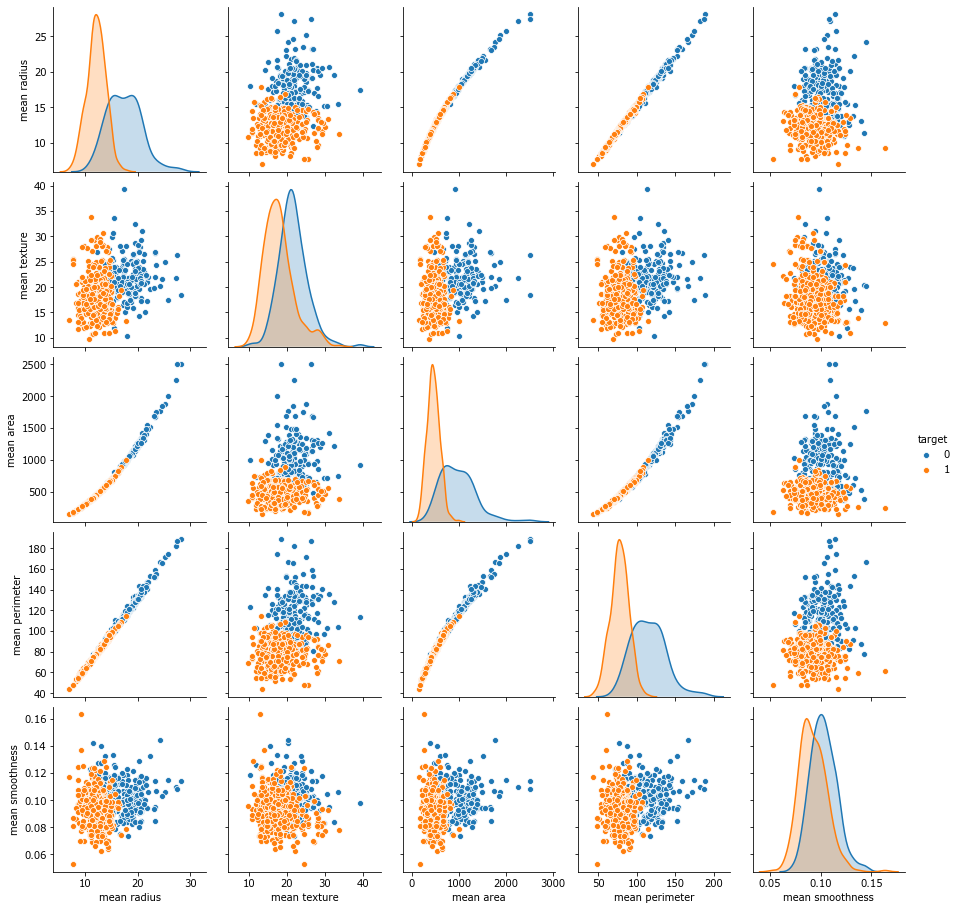

In [11]:
# Pairplot first 5 attributes, showing relationship between each 2 of them
sns.pairplot(df_cancer, hue='target', vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])
plt.show()

According to pairplots above, each pair of attributes is linearly separable.

(Compare means and variances of 2 targets in continuous distributions. e.g. for plot *mean radius vs mean radius*, mean of target 1 is smaller than target 0)

Therefore, we apply **support vector machine (SVM)**. 

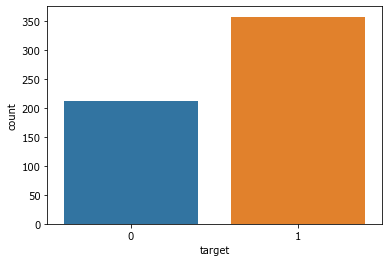

In [12]:
# Distribution of targets
sns.countplot(df_cancer['target'], label='Count')
plt.show()

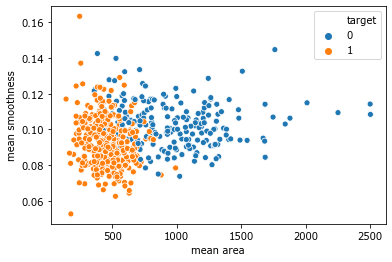

In [13]:
# A scatter plot from pairplot
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=df_cancer)
plt.show()

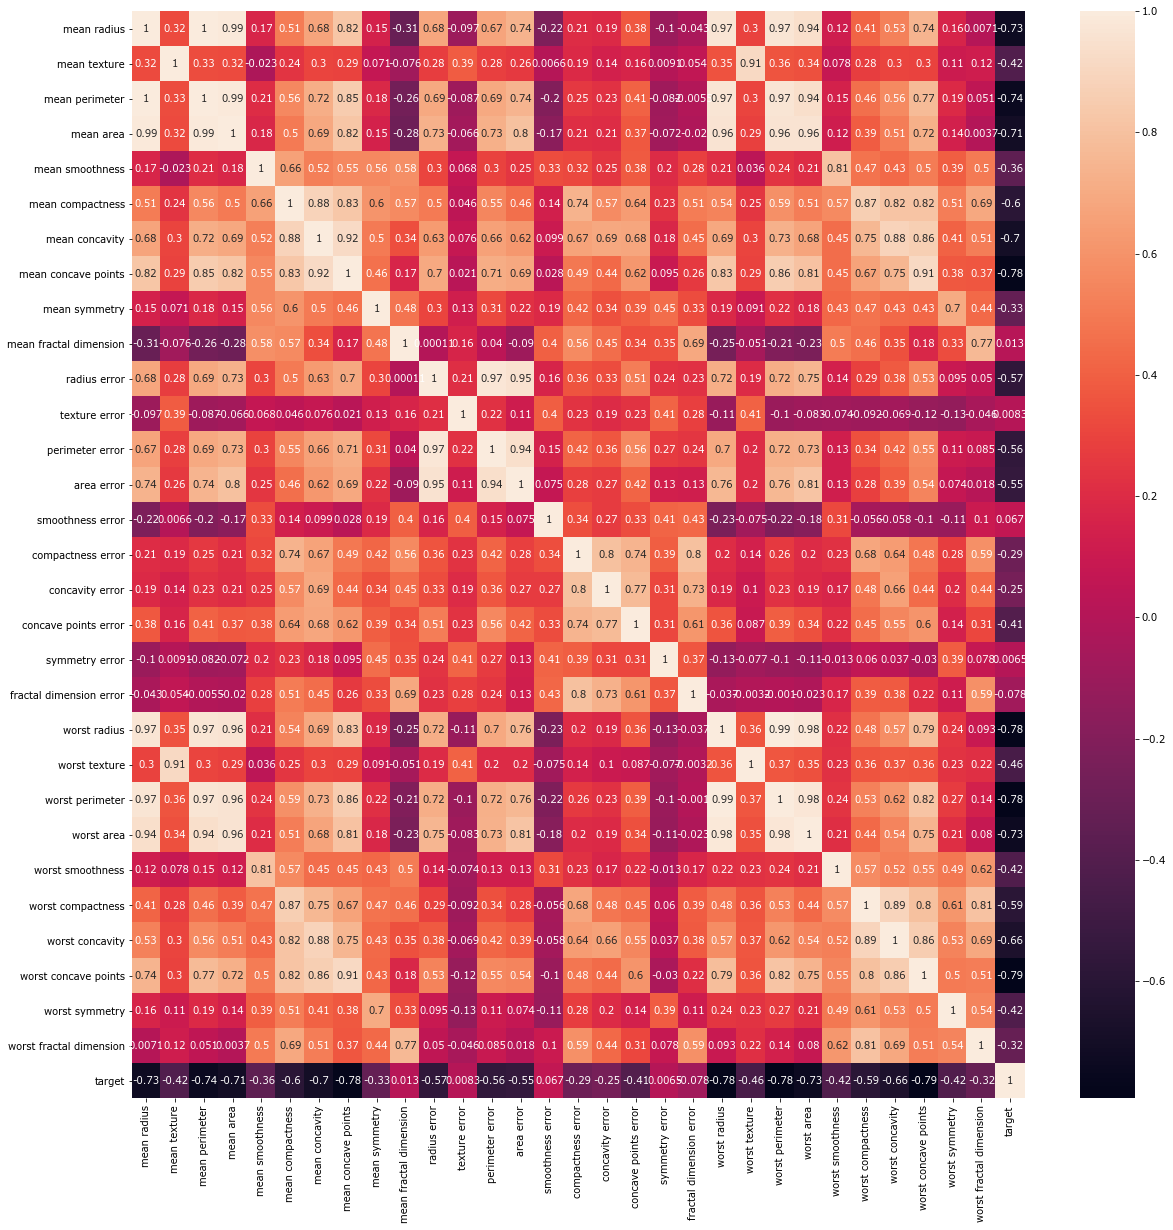

In [14]:
# Check correlations
plt.figure(figsize=(20, 20))
sns.heatmap(df_cancer.corr(), annot=True)
plt.show()

## 4. Model Building

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
X = df_cancer.drop(['target'],axis=1)
y = df_cancer['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
svc = SVC()

In [19]:
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9521276595744681

In [20]:
svc.get_params(deep=True)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## 5. Model Evaluation

In [21]:
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

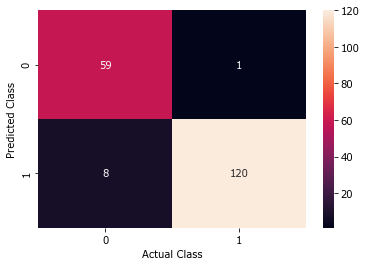

In [22]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()

### Brief Analysis:
FN is small, hence effect of type 2 error is not significant

## 6. Model Improvement

### i. Data Normalization

Normalization (scaling) makes all values of each feature between 0 and 1

In [23]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

In [24]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

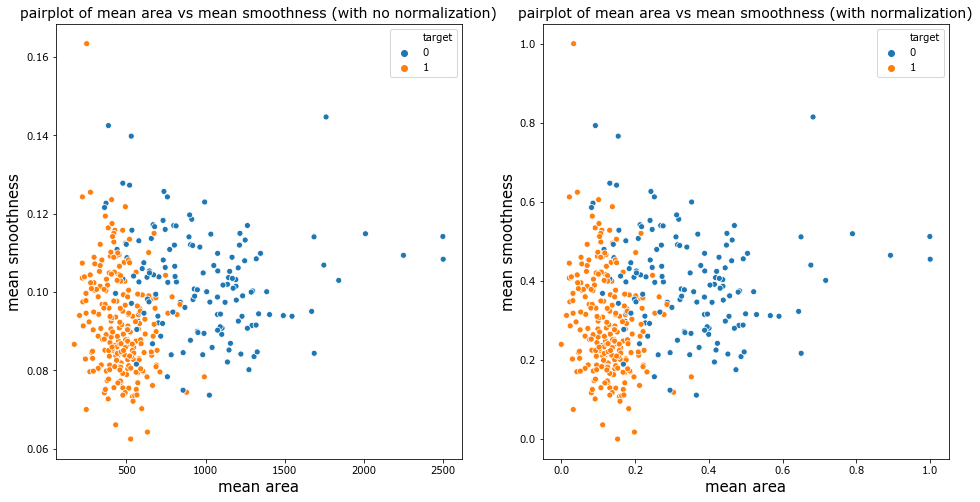

In [25]:
# 2 scatter plots, where the second one is normalized
f, axes = plt.subplots(1, 2, figsize=(16,8))
sns.scatterplot(x=X_train['mean area'], y=X_train['mean smoothness'], hue=y_train, ax=axes[0])
axes[0].set_title('pairplot of mean area vs mean smoothness (with no normalization)', size=14)
axes[0].set_xlabel('mean area', size=15)
axes[0].set_ylabel('mean smoothness', size=15)

sns.scatterplot(x=X_train_scaled['mean area'], y=X_train_scaled['mean smoothness'], hue=y_train, ax=axes[1])
axes[1].set_title('pairplot of mean area vs mean smoothness (with normalization)', size=14)
axes[1].set_xlabel('mean area', size=15)
axes[1].set_ylabel('mean smoothness', size=15)

plt.show()

In [26]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
svc.score(X_test_scaled, y_test)

0.9414893617021277

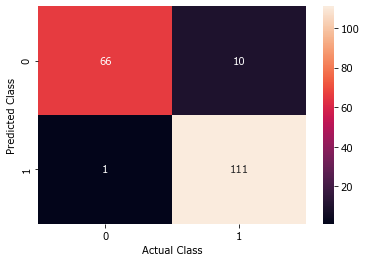

In [27]:
y_pred_scaled = svc.predict(X_test_scaled)
cm = confusion_matrix(y_pred_scaled, y_test)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()

In [28]:
print(classification_report(y_test, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        67
           1       0.99      0.92      0.95       121

    accuracy                           0.94       188
   macro avg       0.93      0.95      0.94       188
weighted avg       0.95      0.94      0.94       188



### Brief Analysis:
The outcome of normalization is not significant. 

(Consider overall accuracy and effect of type 2 error)

### ii. Parameters Optimization (SVM) via Grid Search

e.g. 

Small C (smoother boundary) penalizes low misclassification while big C (harder boundary) is prone to potential overfit

Small gamma considers more points (could be more generalized) while large gamma gives higher weight to instances closer to hyperplane (ignore instances away from hyperplane and more possible to be overfitted)

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [31]:
# Tuning C and Gamma with normalized data

grid = GridSearchCV(SVC(), param_grid, refit=True)
# grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)

grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [32]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [33]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [34]:
grid.score(X_test_scaled, y_test)

0.8829787234042553

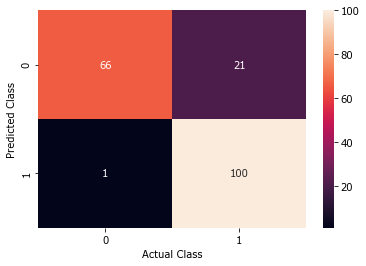

In [35]:
grid_pred = grid.predict(X_test_scaled)
cm = confusion_matrix(grid_pred, y_test)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()

In [36]:
# Tuning C and Gamma with original data
grid = GridSearchCV(SVC(), param_grid, refit=True)
# grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)

grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [37]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [38]:
grid.best_estimator_

SVC(C=1, gamma=0.001)

In [39]:
grid.score(X_test, y_test)

0.9202127659574468

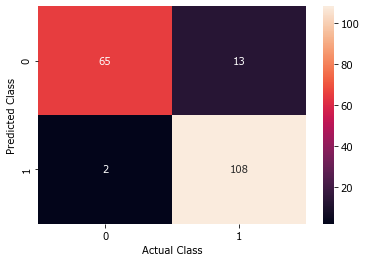

In [40]:
grid_pred = grid.predict(X_test)
cm = confusion_matrix(grid_pred, y_test)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()

In [41]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90        67
           1       0.98      0.89      0.94       121

    accuracy                           0.92       188
   macro avg       0.91      0.93      0.92       188
weighted avg       0.93      0.92      0.92       188



### Brief Analysis:
The outcome of parameters optimization is not significant. The best gamma is not in our grid.

(Consider overall accuracy and effect of type 2 error)